# 2023-09-20 · STA conntest for diff recording quality n durations 

In [3]:
include("lib/Nto1.jl")

using Revise … ✔
using Units, Nto1AdEx, ConnectionTests, ConnTestEval, MemDiskCache … ✔
using StatsBase … ✔


In [4]:
N = 6500
duration = 10minutes
@time sim = Nto1AdEx.sim(N, duration);  # ceil_spikes is true by default

  3.011255 seconds (2.14 M allocations: 1.026 GiB, 2.47% gc time, 43.37% compilation time)


In [11]:
(; Vₛ, Eₗ) = Nto1AdEx

function VI_sig(sim; spike_SNR = 10, spike_height = (Vₛ - Eₗ), seed=1)
    Random.seed!(seed)
    σ = spike_height / spike_SNR
    sig = copy(sim.V)
    sig .+= (σ .* randn(length(sig)))
    sig
end;

sig = VI_sig(sim);

In [14]:
include("lib/plot.jl")

import PythonCall … ✔
import PythonPlot … ✔
using Sciplotlib … ✔
using PhDPlots … ✔


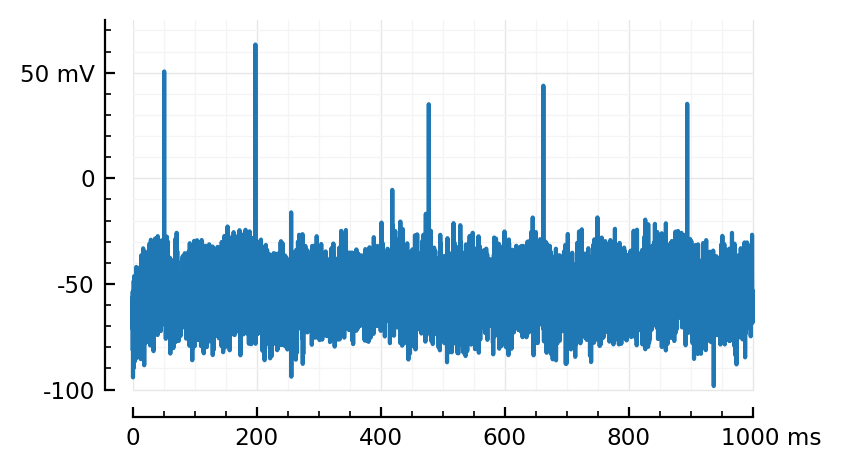

In [15]:
plotsig(sig, [0,1000], ms, yunit=:mV);

Very good.

In [18]:
VI_sig(sim, spike_SNR=Inf) == sim.V

true

Excellent.

In [ ]:
for spike_SNR in [Inf, 10, 4, 2, 1]
    perf = test_conns(sim)
end